#### 1. Import Packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

#### 2. Read Image and Plot

In [3]:
# Open and Read Images
dev_img = Image.open('/kaggle/input/devanagari/Devanagari/TRAIN/1/010_09.jpg')
dev_img1 = Image.open('/kaggle/input/devanagari/Devanagari/TRAIN/2/010_09.jpg')
dev_img2 = Image.open('/kaggle/input/devanagari/Devanagari/TRAIN/3/010_09.jpg')
dev_img3 = Image.open('/kaggle/input/devanagari/Devanagari/TRAIN/4/010_09.jpg')
dev_img4 = Image.open('/kaggle/input/devanagari/Devanagari/TRAIN/5/010_09.jpg')

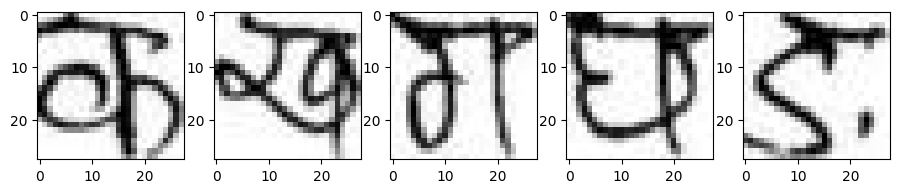

In [4]:
fig = plt.figure(figsize = (11,2))
plt.subplot(1, 5, 1)
img_plot = plt.imshow(dev_img, cmap ='gray')
plt.subplot(1, 5, 2)
img_plot = plt.imshow(dev_img1, cmap ='gray')
plt.subplot(1, 5, 3)
img_plot = plt.imshow(dev_img2, cmap ='gray')
plt.subplot(1, 5, 4)
img_plot = plt.imshow(dev_img3, cmap ='gray')
plt.subplot(1, 5, 5)
img_plot = plt.imshow(dev_img4, cmap ='gray')
plt.show()

#### Step 3. Image Data Augmentation

In [5]:
train_folder = "/kaggle/input/devanagari/Devanagari/TRAIN"
test_folder = "/kaggle/input/devanagari/Devanagari/TEST"

In [6]:
from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator

In [7]:
img = load_img(train_folder + "/2/010_09.jpg")
data = img_to_array(img)
data

array([[[246., 246., 246.],
        [255., 255., 255.],
        [244., 244., 244.],
        ...,
        [254., 254., 254.],
        [252., 252., 252.],
        [249., 249., 249.]],

       [[241., 241., 241.],
        [255., 255., 255.],
        [250., 250., 250.],
        ...,
        [255., 255., 255.],
        [253., 253., 253.],
        [251., 251., 251.]],

       [[250., 250., 250.],
        [255., 255., 255.],
        [250., 250., 250.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [243., 243., 243.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [253., 253., 253.],
        [254., 254., 254.],
        [253., 253., 253.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [247., 247., 247.],
        [251., 251., 251.],
        [252., 252., 252.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [8]:
print(data.shape)

(28, 28, 3)


In [9]:
samples = expand_dims(data, axis = 0)
samples.shape

(1, 28, 28, 3)

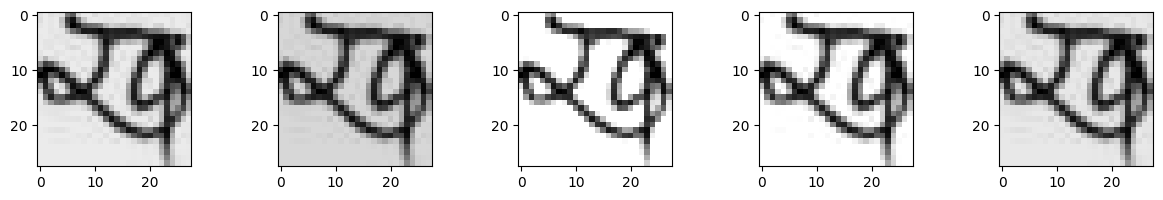

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [10]:
# Change in brightness range 80% - 130%
datagen = ImageDataGenerator(brightness_range = [0.8,1.3])
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (15,2))
for i in range(5):
    fig = plt.figure()
    batch = next(IDG)
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

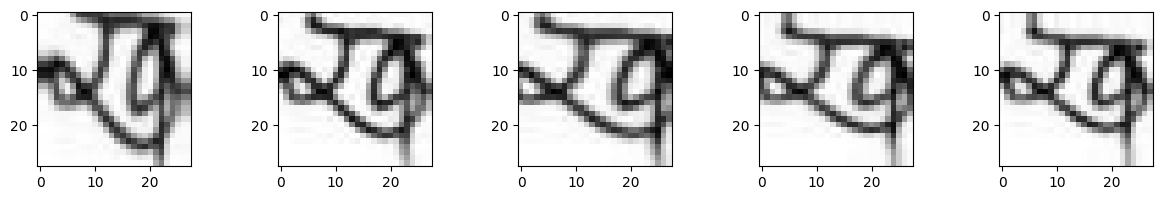

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [11]:
# zoom-in and zoom-out 
datagen = ImageDataGenerator(zoom_range = 0.2)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (15,2))
for i in range(5):
    fig = plt.figure()
    batch = next(IDG)
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

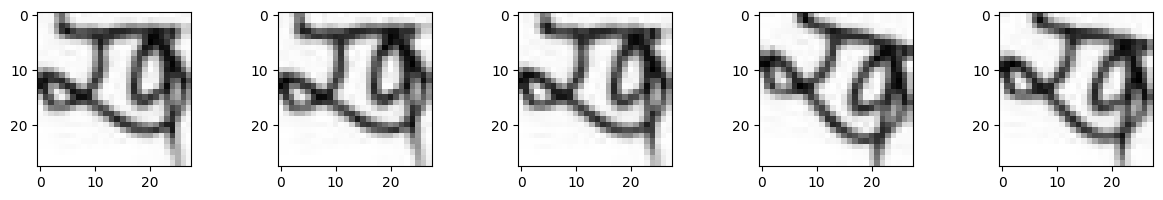

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [12]:
# change in rotation of image data
datagen = ImageDataGenerator(rotation_range = 10)
IDG = datagen.flow(samples, batch_size = 1)
fig, ax = plt.subplots(1, 5, figsize = (15,2))
for i in range(5):
    fig = plt.figure()
    batch = next(IDG)
    image = batch[0].astype('uint8')
    ax[i].imshow(image)
plt.show()

In [13]:
# rescale = Image Pixel Normalization : zoom range = 20%, brightness range = 80%-120%, rotation range = 20 degree
train_datagen = ImageDataGenerator(rescale = 1./255, zoom_range = 0.2, brightness_range = [0.8,1.3], rotation_range = 20)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# class_mode = 'categorical' (multiclass classification) or binary : binary-class classification
# target_size = output image size
training_set = train_datagen.flow_from_directory(train_folder, target_size = (64,64), batch_size = 64, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory(test_folder, target_size = (64,64), batch_size = 64, class_mode = 'categorical')

Found 6528 images belonging to 48 classes.
Found 3312 images belonging to 48 classes.


In [15]:
training_set.image_shape

(64, 64, 3)

In [16]:
training_set.class_indices

{'1': 0,
 '10': 1,
 '11': 2,
 '12': 3,
 '13': 4,
 '14': 5,
 '15': 6,
 '16': 7,
 '17': 8,
 '18': 9,
 '19': 10,
 '2': 11,
 '20': 12,
 '21': 13,
 '22': 14,
 '23': 15,
 '24': 16,
 '25': 17,
 '26': 18,
 '27': 19,
 '28': 20,
 '29': 21,
 '3': 22,
 '30': 23,
 '31': 24,
 '32': 25,
 '33': 26,
 '34': 27,
 '35': 28,
 '36': 29,
 '37': 30,
 '38': 31,
 '39': 32,
 '4': 33,
 '40': 34,
 '41': 35,
 '42': 36,
 '43': 37,
 '44': 38,
 '45': 39,
 '46': 40,
 '47': 41,
 '48': 42,
 '5': 43,
 '6': 44,
 '7': 45,
 '8': 46,
 '9': 47}

#### CNN - Convolutional Neural Network

In [17]:
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential

In [18]:
def build_model():
    model = Sequential()
    # Num of Filters = 128, kernel matrix = 3x3, padding = zero padding layer, activation = 'relu'
    model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu', 
                    input_shape = training_set.image_shape))
    # Normalization of output to avoid overfitting of model
    model.add(BatchNormalization())
    # Conv2D - II
    model.add(Conv2D(filters = 128, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    # Conv2D - III
    model.add(Conv2D(filters = 256, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    # Conv2D - IV
    model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same', activation = 'relu'))
    model.add(BatchNormalization())
    # Flatten Layer
    model.add(Flatten())
    # Fully Connected Neural Network
    model.add(Dense(units = 512, activation = 'relu'))
    model.add(Dense(units = 48, activation = 'softmax'))
    model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [19]:
model = build_model()

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 128)         │           3,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 64, 64, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64, 64, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2097152)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │   1,073,742,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 48)                  │          24,624 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,075,397,552 (4.01 GB)

 Trainable params: 1,075,395,504 (4.01 GB)

 Non-trainable params: 2,048 (8.00 KB)

In [21]:
from tensorflow.keras import callbacks
filepath = "BestModel.keras"
checkpoint = callbacks.ModelCheckpoint(filepath, monitor = "val_loss", save_best_only = True, mode = 'min', verbose = 1)
callbacks_list = [checkpoint]

In [ ]:
history = model.fit(training_set, epochs = 30, shuffle = True, validation_data = training_set, callbacks = callbacks_list, 
         verbose = 1)

Epoch 1/30
 73/102 ━━━━━━━━━━━━━━━━━━━━ 20:27 42s/step - accuracy: 0.0665 - loss: 198.2384